## Cats and Dogs Classification with Image Augmentation and Dropout

In [1]:
import numpy as np
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os

import matplotlib.pyplot as plt

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL, extract=True)

In [3]:
zip_dir

'/Users/adeela/.keras/datasets/cats_and_dogs_filterted.zip'

In [4]:
# !unzip /Users/adeela/.keras/datasets/cats_and_dogs_filterted.zip

In [5]:
# !ls -l  /Users/adeela/.keras/datasets/cats_and_dogs_filtered

In [6]:
zip_dir_base = os.path.dirname(zip_dir)

In [7]:
base_dir = os.path.join(zip_dir_base, 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [8]:
num_cats_train = len(os.listdir(train_cats_dir))
num_dogs_train = len(os.listdir(train_dogs_dir))

num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))

total_train = num_cats_train + num_dogs_train
total_val = num_cats_val + num_dogs_val

In [9]:
print("Total Training {}".format(total_train))
print("Train cats {} ".format(num_dogs_train))
print("Train dogs {}".format(num_cats_train))

Total Training 2000
Train cats 1000 
Train dogs 1000


In [10]:
print("Total Validation {}".format(total_val))
print("Val cats {} ".format(num_dogs_val))
print("Val dogs {}".format(num_cats_val))

Total Validation 1000
Val cats 500 
Val dogs 500


## Setting Model Parameters

In [11]:
BATCH_SIZE =10
IMG_SHAPE=150

## Data Augmentation

## Flipping

In [12]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                              shuffle=True, 
                                              target_size=(IMG_SHAPE,IMG_SHAPE), 
                                              batch_size=BATCH_SIZE)

Found 2000 images belonging to 2 classes.


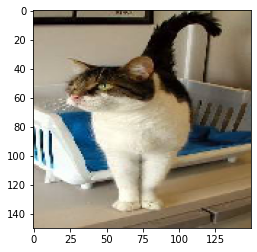

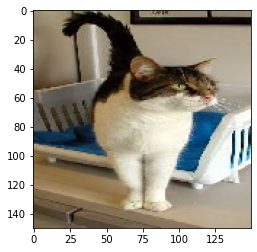

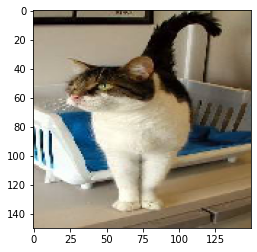

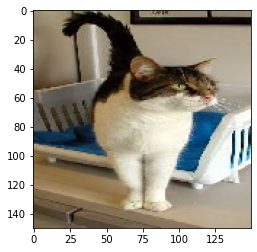

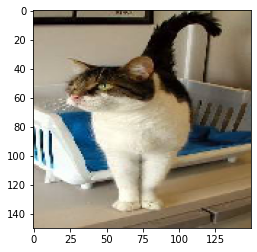

In [13]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

for img in aug_images:
    plt.imshow(img)
    plt.show()    

## Rotation

In [14]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                              shuffle=True, 
                                              target_size=(IMG_SHAPE,IMG_SHAPE), 
                                              batch_size=BATCH_SIZE)

Found 2000 images belonging to 2 classes.


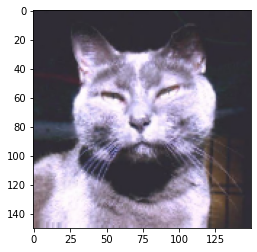

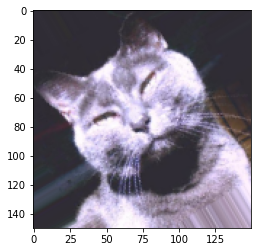

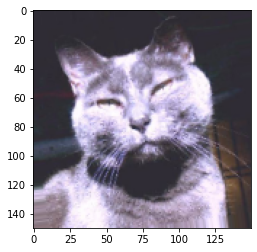

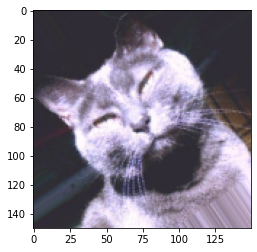

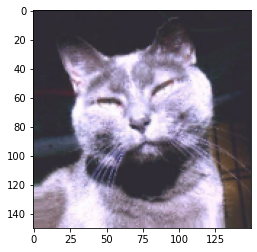

In [15]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

for img in aug_images:
    plt.imshow(img)
    plt.show()    

## Zoom

In [16]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.6)

train_data_gen = image_gen.flow_from_directory(directory = train_dir, 
                                              shuffle=True, 
                                              target_size=(IMG_SHAPE,IMG_SHAPE), 
                                              batch_size=BATCH_SIZE)

Found 2000 images belonging to 2 classes.


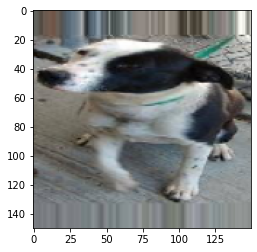

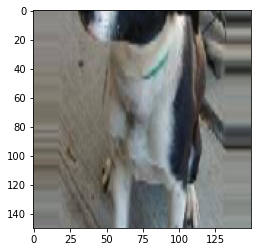

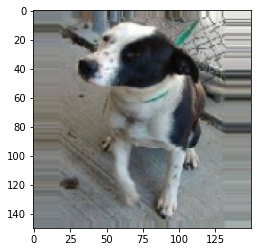

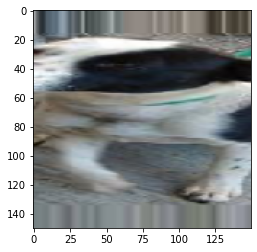

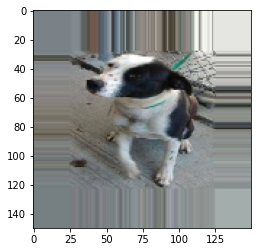

In [17]:
aug_images = [train_data_gen[0][0][0] for i in range(5)]

for img in aug_images:
    plt.imshow(img)
    plt.show()   

## Putting It All Together

## Data Prep

In [18]:
train_img_generator = ImageDataGenerator(rescale=1./255, 
                                        horizontal_flip=True, 
                                        zoom_range=0.5,
                                        rotation_range=45
                                        )

train_data_gen = train_img_generator.flow_from_directory(
                                      directory=train_dir,
                                       batch_size=BATCH_SIZE, 
                                       shuffle=True, 
                                       target_size= (IMG_SHAPE, IMG_SHAPE),
                                       class_mode='binary')

Found 2000 images belonging to 2 classes.


In [19]:
val_img_generator = ImageDataGenerator(rescale=1./255)

val_data_gen = val_img_generator.flow_from_directory(
                                      directory=validation_dir,
                                       batch_size=BATCH_SIZE, 
                                       shuffle=True, 
                                       target_size= (IMG_SHAPE, IMG_SHAPE),
                                       class_mode='binary')

Found 1000 images belonging to 2 classes.


In [20]:
# sample_training_images, labels = next(train_data_gen)

In [21]:
# plt.imshow(sample_training_images[0])
# plt.show()

## Model Creation

In [22]:
l0 = tf.keras.layers.Conv2D(32, (3,3), padding='same', activation=tf.nn.relu, input_shape=(150,150,3))
l1 = tf.keras.layers.MaxPool2D((2,2), strides=2)

l2 = tf.keras.layers.Conv2D(64, (3,3), padding='same', activation=tf.nn.relu)
l3 = tf.keras.layers.MaxPool2D((2,2), strides=2)

l4 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu)
l5 = tf.keras.layers.MaxPool2D((2,2), strides=2)

l6 = tf.keras.layers.Conv2D(128, (3,3), padding='same', activation=tf.nn.relu)
l7 = tf.keras.layers.MaxPool2D((2,2), strides=2)

l8 = tf.keras.layers.Dropout(0.5)

l9 = tf.keras.layers.Flatten()

l10 = tf.keras.layers.Dense(units=512, activation='relu')

l11 = tf.keras.layers.Dense(units=2, activation='softmax')


In [23]:
model = tf.keras.Sequential([l0,l1,l2,l3,l4,l5,l6,l7,l8,l9,l10, l11])

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'], 
             optimizer='adam')

## Model Summary

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 150, 150, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 18, 18, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 18, 18, 128)       1

## Training 

In [25]:
EPOCHS = 100

In [26]:
history = model.fit_generator(train_data_gen, 
                             steps_per_epoch=int(np.ceil(total_train/BATCH_SIZE)), 
                             epochs =EPOCHS, 
                             validation_data= val_data_gen, 
                             validation_steps=int(np.ceil(total_val/BATCH_SIZE)))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
200/200 [==============================] - 36s 178ms/step - loss: 0.8136 - accuracy: 0.4980 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 2/100
200/200 [==============================] - 36s 180ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 3/100
200/200 [==============================] - 35s 177ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 4/100
200/200 [==============================] - 35s 174ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 5/100
200/200 [==============================] - 35s 174ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 6/100
200/200 [==============================] - 35s 173ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 7/100
200/200 [===========================

200/200 [==============================] - 36s 178ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 56/100
200/200 [==============================] - 34s 172ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 57/100
200/200 [==============================] - 34s 169ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 58/100
200/200 [==============================] - 34s 168ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 59/100
200/200 [==============================] - 34s 171ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 60/100
200/200 [==============================] - 34s 171ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_accuracy: 0.5000
Epoch 61/100
200/200 [==============================] - 34s 171ms/step - loss: 0.8133 - accuracy: 0.5000 - val_loss: 0.8133 - val_a

## Visualize 

In [27]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range= range(EPOCHS)

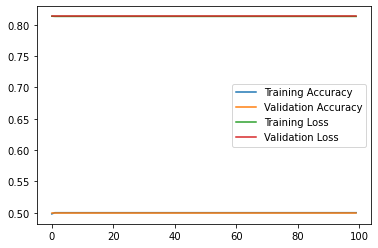

In [28]:
plt.plot(epochs_range, acc, label = "Training Accuracy")
plt.plot(epochs_range, val_acc, label="Validation Accuracy")


plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label = "Validation Loss")

plt.legend()
plt.show()
